In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import zlib


In [9]:
# Number of bits
N = 10**6*8  

In [3]:
def generate_binomial_binary_file(N, p, filename='binomial_binary.bin'):
    """
    Generate a binary file with N bits from a binomial distribution.
    
    Parameters:
    N (int): Total number of bits to generate
    p (float): Probability parameter for the binomial distribution
    filename (str): Name of the output binary file
    
    Returns:
    numpy.ndarray: Generated binary data
    """
    # Validate inputs
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1")
    
    # Generate binary data using binomial distribution
    binary_data = np.random.binomial(n=1, p=p, size=N)
    
    # Convert to bytes for file writing
    byte_data = np.packbits(binary_data)
    
    # Write to binary file
    with open(filename, 'wb') as f:
        f.write(byte_data)
    
    return binary_data


In [4]:
def calculate_entropy(p):
    """
    Calculate binary entropy for a given probability.
    
    Parameters:
    p (float): Probability of 1
    
    Returns:
    float: Entropy value
    """
    if p == 0 or p == 1:
        return 0.0
    
    return -p * math.log2(p) - (1 - p) * math.log2(1 - p)


In [5]:
def analyze_entropy_and_compression():
    """
    Generate binary files for different probabilities,
    calculate entropy and compressed file sizes.
    
    Returns:
    tuple: Lists of probabilities, entropies, and file sizes
    """
    # Generate probabilities from 0 to 1 with 0.05 step
    probabilities = np.arange(0, 1.01, 0.05)

    # Lists to store results
    entropies = []
    file_sizes = []
    
    for p in probabilities:
        # Generate binary file
        filename = f'data/binary_p_{p:.2f}.bin'
        binary_data = generate_binomial_binary_file(N, p, filename)
        
        # Calculate entropy
        entropy = N*calculate_entropy(p)
        entropies.append(entropy)
        
        # Calculate compressed file size
        with open(filename, 'rb') as f:
            compressed_data = zlib.compress(f.read())
        file_sizes.append(len(compressed_data)*8)
    
    return probabilities, entropies, file_sizes


In [6]:
def plot_results():
    """
    Plot entropy and file sizes against probabilities.
    """
    probabilities, entropies, file_sizes = analyze_entropy_and_compression()
    
    # Create a figure
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot Entropy on the left y-axis
    ax1.plot(probabilities, entropies, 'b-', label='Entropy')
    ax1.set_xlabel('Probability (p)')
    ax1.set_ylabel('Entropy (bits)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.grid(True)
    
    # Create a second y-axis for file size
    ax2 = ax1.twinx()
    ax2.plot(probabilities, file_sizes, 'r-', label='Compressed File Size')
    ax2.set_ylabel('Size (bytes)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Add legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.title('Entropy and Compressed File Size vs. Probability')
    plt.tight_layout()
    plt.show()
    plt.close()


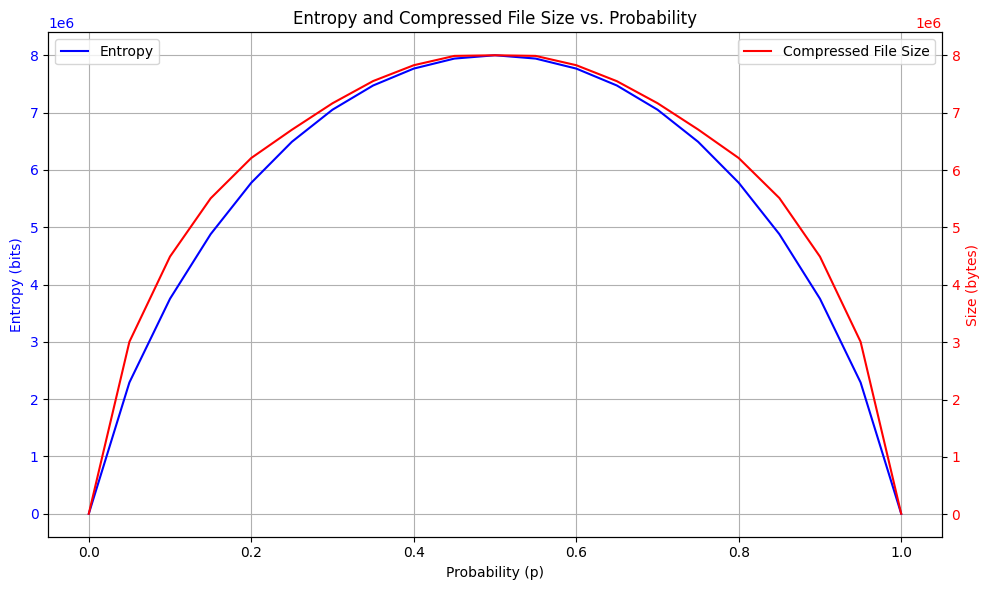

In [10]:
plot_results()